In [14]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [15]:
# Replace with your own API key
API_KEY = "fb365aa6104829b44455572365ff3b4e"
CITY = "Bengaluru"
BASE_URL = "https://api.openweathermap.org/data/2.5/forecast"

# Create request URL
params = {
    'q': CITY,
    'appid': API_KEY,
    'units': 'metric'  # To get data in Celsius
}

response = requests.get(BASE_URL, params=params)
data = response.json()

# Check sample output
print(data.keys())


dict_keys(['cod', 'message', 'cnt', 'list', 'city'])


In [16]:
weather_list = []

for record in data['list']:
    weather_list.append({
        'datetime': datetime.fromtimestamp(record['dt']),
        'temperature': record['main']['temp'],
        'feels_like': record['main']['feels_like'],
        'humidity': record['main']['humidity'],
        'pressure': record['main']['pressure'],
        'wind_speed': record['wind']['speed'],
        'weather': record['weather'][0]['main']
    })

df = pd.DataFrame(weather_list)
print(df.head())


             datetime  temperature  feels_like  humidity  pressure  \
0 2025-11-07 02:30:00        20.96       21.41        88      1012   
1 2025-11-07 05:30:00        20.65       21.02        86      1012   
2 2025-11-07 08:30:00        21.29       21.56        80      1015   
3 2025-11-07 11:30:00        23.37       23.28        58      1014   
4 2025-11-07 14:30:00        24.95       25.04        59      1010   

   wind_speed weather  
0        2.73    Rain  
1        1.83    Rain  
2        1.71  Clouds  
3        2.96  Clouds  
4        2.41  Clouds  


In [17]:
#clean and preprocess data
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing
df.fillna(method='ffill', inplace=True)

# Ensure datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)


datetime       0
temperature    0
feels_like     0
humidity       0
pressure       0
wind_speed     0
weather        0
dtype: int64


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_22956\2614888454.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [18]:
#analyze weather patterns
print("Average Temperature:", df['temperature'].mean())
print("Max Temperature:", df['temperature'].max())
print("Min Temperature:", df['temperature'].min())

# Group by day
daily_summary = df.resample('D').agg({
    'temperature': ['mean', 'max', 'min'],
    'humidity': 'mean',
    'wind_speed': 'mean'
})
daily_summary.columns = ['temp_mean', 'temp_max', 'temp_min', 'humidity_mean', 'wind_mean']
daily_summary.reset_index(inplace=True)

print(daily_summary.head())


Average Temperature: 21.10775
Max Temperature: 25.95
Min Temperature: 15.84
    datetime  temp_mean  temp_max  temp_min  humidity_mean  wind_mean
0 2025-11-07   22.03750     24.95     20.65         75.125    2.49375
1 2025-11-08   22.00125     25.65     19.31         67.750    2.54375
2 2025-11-09   20.96625     25.88     17.28         56.125    3.03625
3 2025-11-10   20.23125     25.80     15.94         52.875    2.19625
4 2025-11-11   20.30250     25.95     15.84         52.000    2.26125


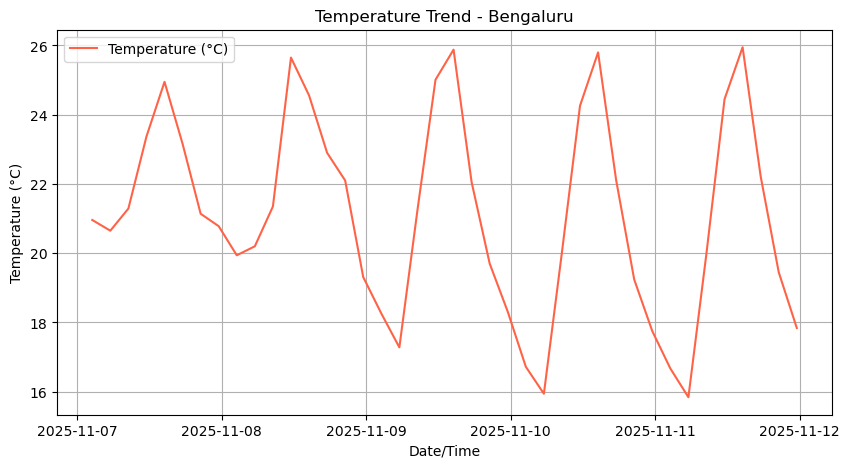

In [19]:
#visualize weather trends
plt.figure(figsize=(10,5))
plt.plot(df.index, df['temperature'], label='Temperature (°C)', color='tomato')
plt.title(f"Temperature Trend - {CITY}")
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


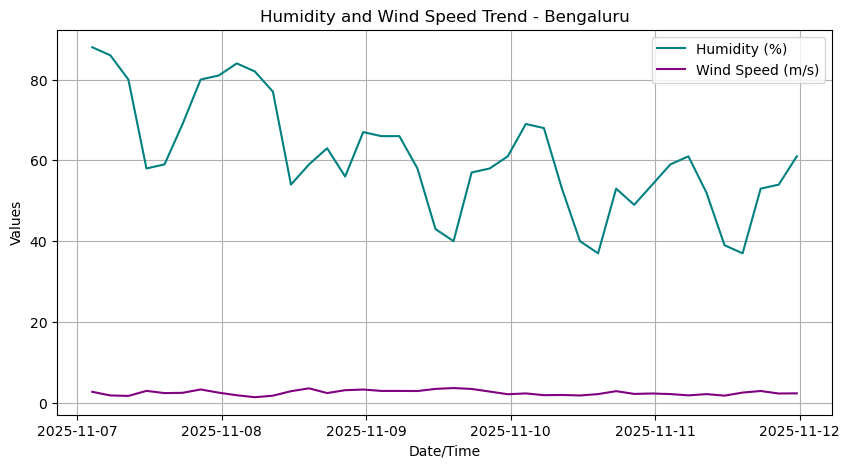

In [20]:
#humidity and wind speed trends
plt.figure(figsize=(10,5))
plt.plot(df.index, df['humidity'], label='Humidity (%)', color='teal')
plt.plot(df.index, df['wind_speed'], label='Wind Speed (m/s)', color='purple')
plt.title(f"Humidity and Wind Speed Trend - {CITY}")
plt.xlabel('Date/Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


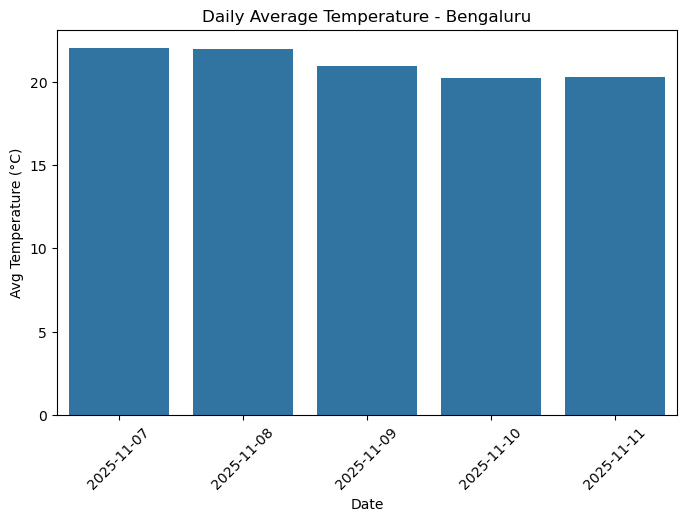

In [21]:
#daily average temperature bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='datetime', y='temp_mean', data=daily_summary)
plt.title(f"Daily Average Temperature - {CITY}")
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_22956\1623658892.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='temperature', data=monthly_summary, palette='coolwarm')


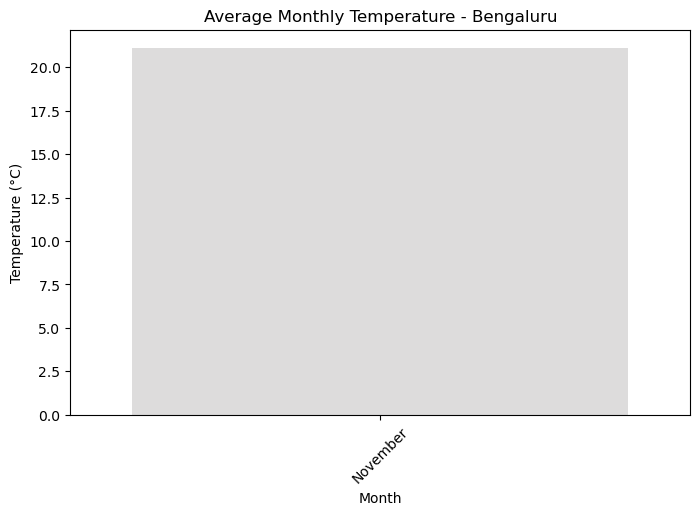

In [22]:
#  Data Aggregation by Time Periods
df['day'] = df.index.day
df['month'] = df.index.month_name()

monthly_summary = df.groupby('month')['temperature'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='month', y='temperature', data=monthly_summary, palette='coolwarm')
plt.title(f"Average Monthly Temperature - {CITY}")
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


In [23]:
# import folium

# # Example city coordinates
# map_weather = folium.Map(location=[12.9716, 77.5946], zoom_start=6)

# # Add marker
# tooltip = f"{CITY}: {df['temperature'].iloc[-1]}°C"
# folium.Marker(
#     [12.9716, 77.5946],
#     popup=f"{CITY}",
#     tooltip=tooltip,
#     icon=folium.Icon(color='blue')
# ).add_to(map_weather)

# map_weather


In [24]:
# pip install folium

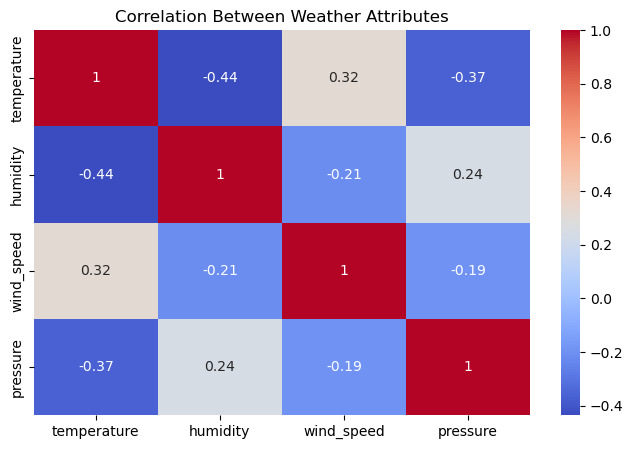

In [25]:
#Explore Relationships Between Weather Attributes
plt.figure(figsize=(8,5))
sns.heatmap(df[['temperature', 'humidity', 'wind_speed', 'pressure']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Attributes")
plt.show()
